# Importando os módulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Carregando os dados

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Visualização dos dados

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
# Verificando os tipos dos dados.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Pronto!
Já sabemos quais são as variáveis do nosso conjunto de dados e seus tipos. Mas antes de começar a plotar nossos gráficos vamos dar uma olhada no resumo estatístico das nossas variáveis.

# Resumo estatístico

In [6]:
# Variáveis numéricas.
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# Variáveis categóricas.
train.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


#  Exploratory Data Analysis (EDA)

Começaremos a nossa análise verificando a distribuição da nossa variável alvo (Purchase).

Text(0.5, 1.0, 'Distribuição dos valores')

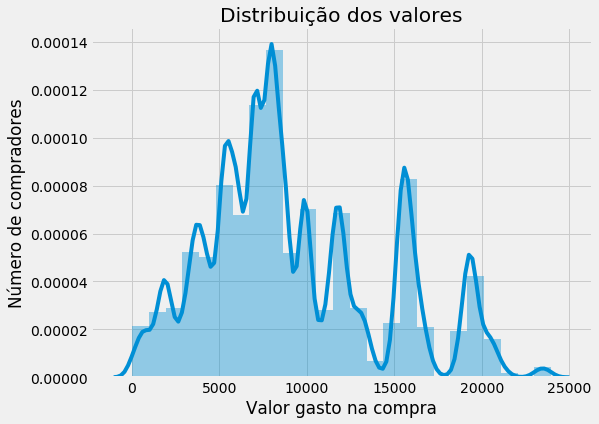

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel('Valor gasto na compra')
plt.ylabel('Número de compradores')
plt.title('Distribuição dos valores')

Até o momento a única informação que temos é que existe uma maior concentração entre os valores de 5000 a 10000 dólares. Seria mais interessante plotarmos um gráfico de boxplot para uma melhor avaliação da distribuição desses dados, além disso podemos facilmente descobrir se temos outliers.

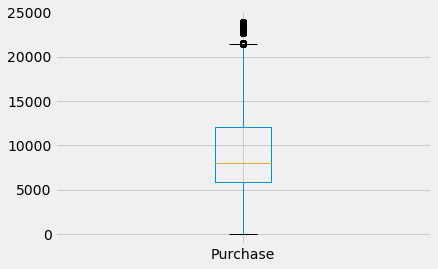

In [9]:
train['Purchase'].plot.box()

E olha só esse gráfico acaba de nos dar uma imformação muito importante, temos outliers na nossa variável alvo. Podemos facilmente afirmar que os valores de compra acima de 20000 dólares são outliers.

# Será que temos mais usuários do sexo masculino ou do sexo feminino?

In [10]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

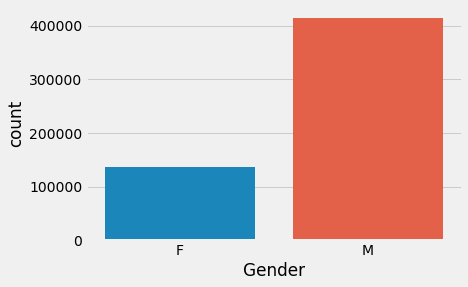

In [11]:
sns.countplot(train.Gender)

# Qual o valor médio da compra para cada sexo?

In [12]:
train[['Gender','Purchase']].groupby(['Gender'], as_index = True).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Gender,
M,9437.526040
F,8734.565765


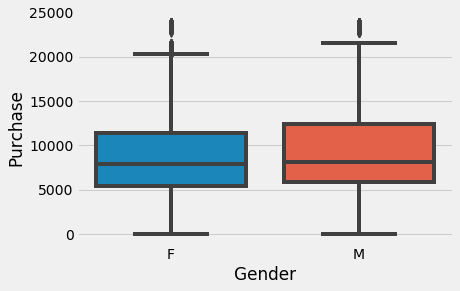

In [13]:
sns.boxplot('Gender', 'Purchase', data=train)

Bom, o que podemos obsevar é que temos um número bem maior de usuários do sexo masculino e que o valor da compra também tende a ser um pouco maior que a do sexo feminino.

# Qual é a idade predominante entre esses usuários?

In [14]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

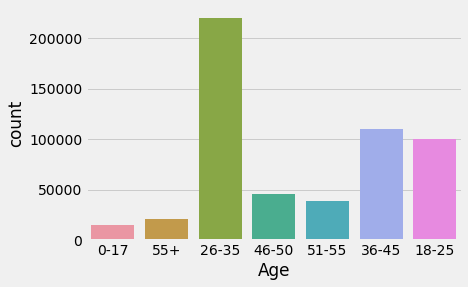

In [15]:
sns.countplot(train.Age)

Observe que a faixa etária entre os usuários se concentra entre 26 a 30 anos, mais ainda não conseguimos saber se nessa faixa etária temos mais homens ou mulheres. O código a seguir agrupa os dados por sexo e faz a contagem dos registros por faixa etária.

In [16]:
train.groupby('Gender')['Age'].value_counts()

Gender  Age  
F       26-35     50752
        36-45     27170
        18-25     24628
        46-50     13199
        51-55      9894
        0-17       5083
        55+        5083
M       26-35    168835
        36-45     82843
        18-25     75032
        46-50     32502
        51-55     28607
        55+       16421
        0-17      10019
Name: Age, dtype: int64

Agora sim podemos dizer que temos mais homens que mulheres na faixa etária de 26 a 30 anos.

# Qual o valor médio de compra para cada faixa etária?

In [17]:
train[['Age','Purchase']].groupby(['Age'], as_index = True).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Age,
51-55,9534.808031
55+,9336.280459
36-45,9331.350695
26-35,9252.690633
46-50,9208.625697
18-25,9169.663606
0-17,8933.464640


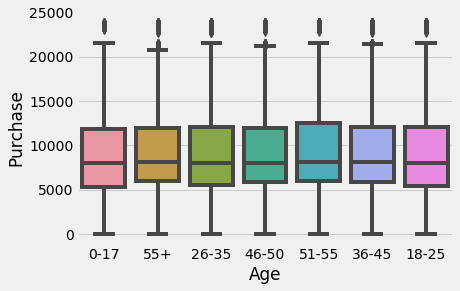

In [18]:
sns.boxplot('Age', 'Purchase', data=train)

O valor médio da compra está bem distribuido entre as idades, com o valor um pouco menor na faixa etária de 0 a 17 anos.

# Vamos observar o número de consumidores por ocupação.

In [19]:
train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

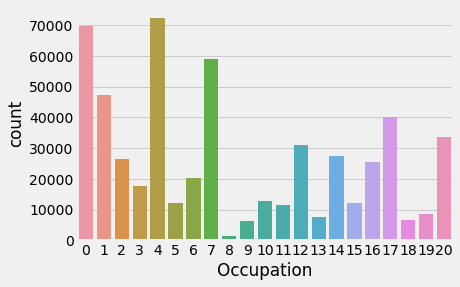

In [20]:
sns.countplot(train.Occupation)

In [21]:
train[['Occupation','Purchase']].groupby(['Occupation'], as_index = True).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Occupation,
17,9821.478236
12,9796.640239
15,9778.891163
8,9532.592497
14,9500.702772
7,9425.728223
16,9394.464349
5,9333.149298
13,9306.351061


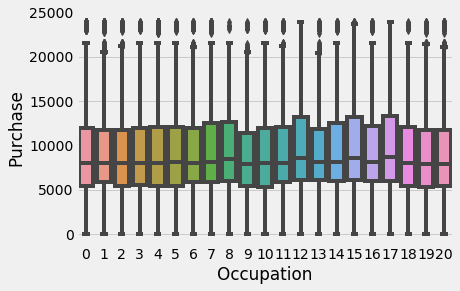

In [22]:
sns.boxplot('Occupation', 'Purchase', data=train)

Temos algumas ocupações com maior concentração de valores, só não sabemos que ocupações são essas, já que a empresa preferiu mascarar essa informação. 

# De qual categoria é a cidade com o maior número de usuários?

In [23]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

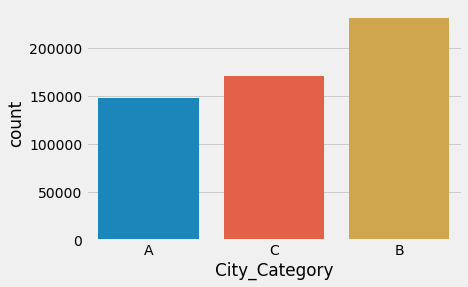

In [24]:
sns.countplot(train.City_Category)

# Qual a média de compra por cidade?

In [25]:
train[['City_Category','Purchase']].groupby(['City_Category'], as_index = True).mean().sort_values(by='Purchase',ascending=False)

,Purchase
City_Category,
C,9719.920993
B,9151.300563
A,8911.939216


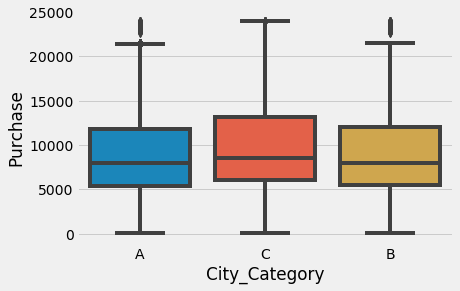

In [26]:
sns.boxplot('City_Category', 'Purchase', data=train)

Chegamos a seguinte conclusão: o maior número de usuários pertence a cidade de categoria B, porém a cidade de categoria C tem o maior valor médio de compra.

# A quantos anos o usuário mora na cidade atual?

In [27]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

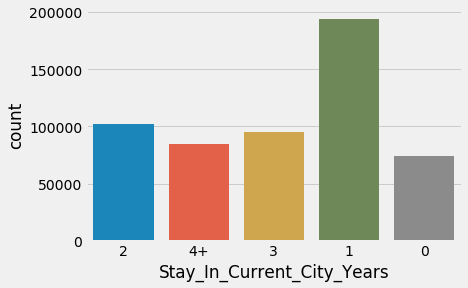

In [28]:
sns.countplot(train.Stay_In_Current_City_Years)

# Qual a média do valor da compra de acordo com o número de anos que o usuário mora na cidade atual.

In [29]:
train[['Stay_In_Current_City_Years','Purchase']].groupby(['Stay_In_Current_City_Years'], as_index = True).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Stay_In_Current_City_Years,
2,9320.429810
3,9286.904119
4+,9275.598872
1,9250.145923
0,9180.075123


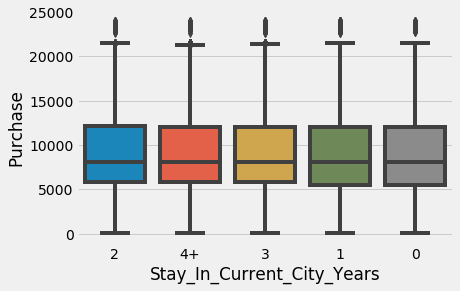

In [30]:
sns.boxplot('Stay_In_Current_City_Years', 'Purchase', data=train)

 De acordo com os nossos gráficos os usuários na sua grande maioria moram há 1 ano na cidade atual.

# Agora queremos saber qual o estado civil dos consumidores.

In [31]:
train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

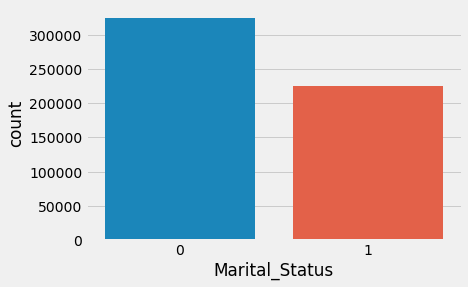

In [32]:
sns.countplot(train.Marital_Status)

In [33]:
train[['Marital_Status','Purchase']].groupby(['Marital_Status'], as_index = True).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


# Qual o valor médio de compra para cada estado civil?

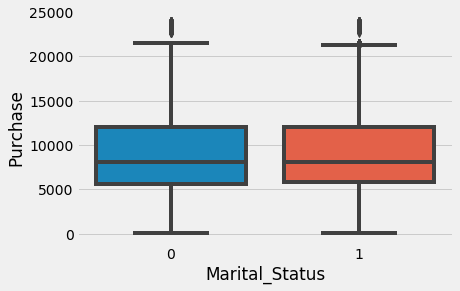

In [34]:
sns.boxplot('Marital_Status', 'Purchase', data=train)

Por default 0 = False e 1 = True, ou seja 0 não é casado e 1 é casado. Dito isso fica claro que os usuários em sua maioria não são casados.

# Vamos analisar algumas informações sobre a categoria dos produtos

In [35]:
train['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [36]:
train[['Product_Category_1','Purchase']].groupby(['Product_Category_1'], as_index = True).mean().sort_values(by='Purchase',ascending=True)

,Purchase
Product_Category_1,
19,37.041797
20,370.481176
13,722.400613
12,1350.859894
4,2329.659491
18,2972.864320
11,4685.268456
5,6240.088178
8,7498.958078


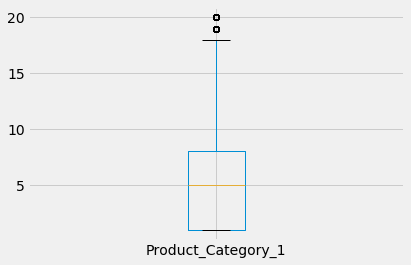

In [37]:
train['Product_Category_1'].plot.box()

Os produtos da categoria 1 que pertencem ao grupo 19 e 20 são outliers.

In [38]:
train['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [39]:
train[['Product_Category_2','Purchase']].groupby(['Product_Category_2'], as_index = True).mean().sort_values(by='Purchase',ascending=True)

,Purchase
Product_Category_2,
7.0,6884.683706
12.0,6975.472504
14.0,7105.264916
9.0,7277.006851
11.0,8940.580515
5.0,9027.821574
18.0,9352.440433
17.0,9421.576577
13.0,9683.352388


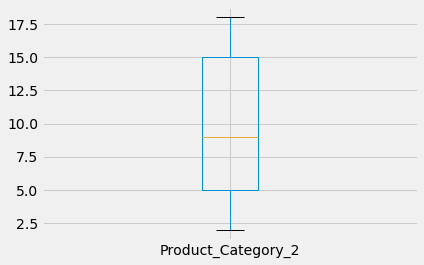

In [40]:
train['Product_Category_2'].plot.box()

Já na categoria 2, temos uma maior quantidade de produtos do grupo 8. Podemos observar também que o produto do grupo 10 teve o maior valor médio de compra.

In [41]:
train['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [42]:
train[['Product_Category_3','Purchase']].groupby(['Product_Category_3'], as_index = True).mean().sort_values(by='Purchase',ascending=True)

,Purchase
Product_Category_3,
12.0,8715.512762
4.0,9794.386667
14.0,10052.594530
9.0,10431.697210
18.0,10993.980773
17.0,11769.943001
16.0,11981.890642
11.0,12091.437673
5.0,12117.786889


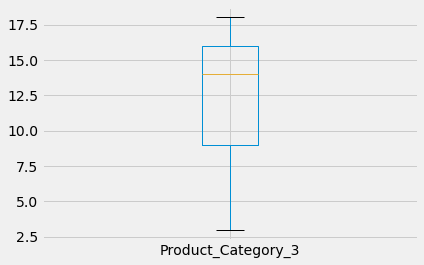

In [43]:
train['Product_Category_3'].plot.box()

Na categoria 3 temos o produto do grupo 3 com a menor quantidade. Dando uma verificada mais detalhada, chegamos a uma informação importante, na categoria 2 e 3 temos um valor médio de compra bem próximo para os produtos do grupo 10.

# Agora vamos verificar graficamente as informações citadas acima.

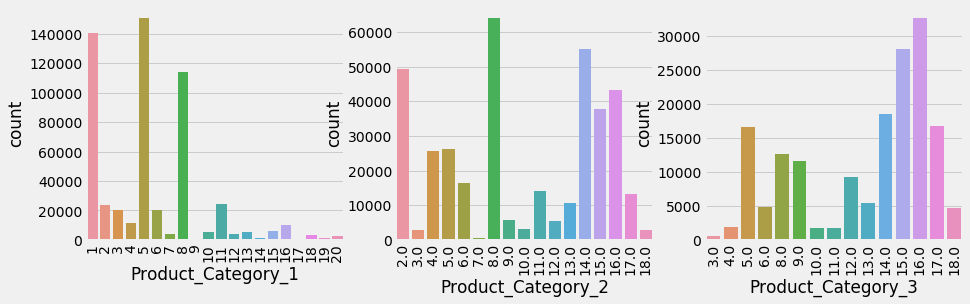

In [44]:
# Distribuição dos valores para cada categoria.
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.countplot(train.Product_Category_1)
plt.xticks(rotation=90)

plt.subplot(132)
sns.countplot(train.Product_Category_2)
plt.xticks(rotation=90)

plt.subplot(133)
sns.countplot(train.Product_Category_3)
plt.xticks(rotation=90)

plt.show()

E por último mais não menos importante, temos a matriz de correlação, que nos possibilita fazer uma análise silmultânea da associação entre as variáveis.

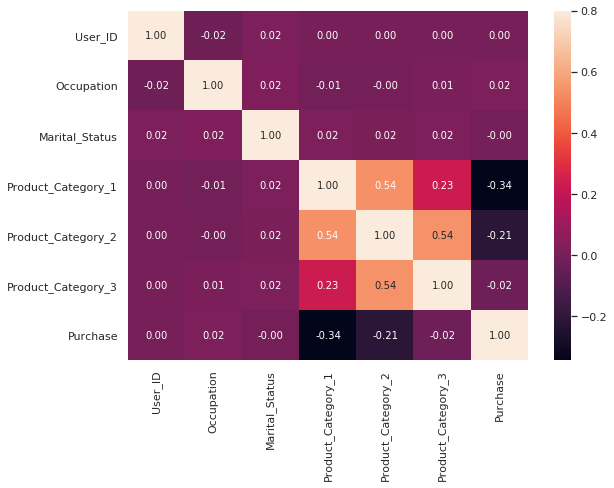

In [45]:
matrix = train.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(matrix, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f')
plt.show()

Um ponto importante a se observar é a alta correlação entre a categoria dos produtos. Isso já era esperado uma vez que foi dito que um produto pode pertencer a mais de uma categoria.

Meu objetivo principal foi mostrar como podemos extrair importantes informações através de técnicas estatísticas e visualização de dados.
Abaixo vou resumir o que foi descoberto.
- A maioria dos usuários é do sexo masculino
- Com idade entre 26 a 30 anos
- Não são casados
- Residem na cidade de categoria B
- Moram 1 ano na cidade atual
- E compraram mais produtos da categoria 1.